In [1]:
#3/7/24 Neural Net for model creation using Combined Mutagen Chemopy Data with K-Fold
#Suppress unneeded low level warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math
import sys
sys.path.insert(1, '/Users/james/Documents/Honours/Python')
from Function_Repo import metriccalc
from Function_Repo import nnmetrics
import matplotlib.pyplot as plt

#Data import
#targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Mutagen/mutagenMorganfp.csv')
seed = 81
datasets = []
index = []
directory = '/Users/james/Documents/Honours/Data/structdata/Mutagen/chemopy/'
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        #df.drop(columns=['SMILES'], inplace=True)
        df = df.dropna(axis=1)
        datasets.append(df)
        index.append(file)

targetdata = datasets[0]
for item in datasets[1:]:
    targetdata = pd.concat([targetdata, item.iloc[:,2:]], axis=1)

targetdata = targetdata.dropna()

#Splitting data into 5 folds 
dfarray = targetdata.to_numpy()
#First set aside 20% of the data for a final validation at the end
dfarray, tempset = train_test_split(dfarray, test_size=0.2, random_state=seed, stratify = targetdata['Toxicity_Values'])

size = len(dfarray) / 5
splitsize = math.ceil(size)
empty = [[] for _ in range(5)]
splits = []
for list in empty:
    splits.append(list)

loops = 0
currsplit = 0
#Results in a list of 5 lists that each contain 1/5 of the targetdata
for row in dfarray:
    splits[currsplit].append(row)
    if loops == splitsize:
        loops = 0
        currsplit = currsplit + 1
    loops = loops + 1

folds = []
for split in splits:
    temp = pd.DataFrame(split)
    folds.append(temp)

In [2]:
pd.set_option('display.max_columns', None)
targetdata

,SMILES,Toxicity_Values,kappam1,kappam2,kappam3,phi,kappa1,kappa2,kappa3,IC0,IC1,IC2,IC3,IC4,IC5,IC6,SIC0,SIC1,SIC2,SIC3,SIC4,SIC5,SIC6,CIC0,CIC1,CIC2,CIC3,CIC4,CIC5,CIC6,Chiv0,Chiv1,Chiv2,Chiv3,Chiv4,Chiv5,Chiv6,Chiv7,Chiv8,Chiv9,Chiv10,Chi3c,Chi4c,Chi4pc,Chi3ch,Chi4ch,Chi5ch,Chi6ch,Chi0,Chi1,Chi2,Chi3,Chi4,Chi5,Chi6,Chi7,Chi8,Chi9,Chi10,Chiv3c,Chiv4c,Chiv4pc,Chiv3ch,Chiv4ch,Chiv5ch,Chiv6ch,mChi1,knotp,dchi0,dchi1,dchi2,dchi3,dchi4,knotpv,Weight,nH,nHal,nHet,nHA,nF,nCl,nBr,nI,nC,nP,nS,nO,nN,nRing,nRotB,nHBD,nHBA,nSBond,nDBond,nTBond,nAroBond,nAtom,AWeight,path_L1,path_L2,path_L3,path_L4,path_L5,path_L6,TPSA1,LabuteASA,slogPVSA0,slogPVSA1,slogPVSA2,slogPVSA3,slogPVSA4,slogPVSA5,slogPVSA6,slogPVSA7,slogPVSA8,slogPVSA9,slogPVSA10,slogPVSA11,SMRVSA0,SMRVSA1,SMRVSA2,SMRVSA3,SMRVSA4,SMRVSA5,SMRVSA6,SMRVSA7,SMRVSA8,SMRVSA9,PEOEVSA0,PEOEVSA1,PEOEVSA2,PEOEVSA3,PEOEVSA4,PEOEVSA5,PEOEVSA6,PEOEVSA7,PEOEVSA8,PEOEVSA9,PEOEVSA10,PEOEVSA11,PEOEVSA12,PEOEVSA13,EstateVSA0,EstateVSA1,EstateVSA2,EstateVSA3,EstateVSA4,EstateVSA5,EstateVSA6,EstateVSA7,EstateVSA8,EstateVSA9,EstateVSA10,VSAEstate0,VSAEstate1,VSAEstate2,VSAEstate3,VSAEstate4,VSAEstate5,VSAEstate6,VSAEstate7,VSAEstate8,VSAEstate9,QNmax,QNmin,QNss,Tpc,Rnc,Rpc,Shev,Scar,Shal,Shet,Save,Smax,Smin,DS,MR,LogP,LogP2,TPSA,UI,Hy
0,OC[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO,0,11.760000,5.413461,3.359629,5.305192,12.000000,5.612245,3.515625,1.457266,2.276611,3.180833,4.008132,4.315824,4.103910,4.085055,0.310028,0.484340,0.676710,0.852714,0.918175,0.873091,0.869079,3.243174,2.423829,1.519607,0.692308,0.384615,0.596530,0.615385,6.406896,3.481748,2.481029,1.512478,0.671209,0.272757,0.081117,0.011111,0.000000,0.000000,0.000000,0.856305,0.000000,2.479163,0.000000,0.0,0.000000,0.000000,9.723615,5.540111,4.489298,3.912383,1.779993,0.753102,0.268246,0.055556,0.000000,0.000000,0.000000,0.382951,0.000000,0.685335,0.000000,0.0,0.000000,0.000000,0.503646,1.622858,3.316718,2.058364,2.008269,2.399904,1.108784,0.302384,168.060,14,0,6,12,0,0,0,0,6,0,6,6,0,0,5,6,6,11,0,0,0,26,14.005000,11,14,16,12,8,4,121.38,69.329364,0.000000,68.268794,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,30.639164,0.000000,0.000000,0.000000,24.415866,13.213764,0.000000,0.0,0.000000,0.000000,30.639164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.213764,24.415866,0.000000,0.000000,0.000000,0.000000,37.629629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.639164,0.000000,0.0,0.000000,0.000000,52.176914,0.000000,0.000000,0.000000,-6.391944,-1.451636,0.000000,0.000000,0.000000,0.000000,0.000000,2.338012,0.168339,0.090128,44.333333,-24.448769,0.000000,68.782102,3.694444,8.956620,-1.669306,10.625926,38.1988,-3.58540,12.855093,121.38,0.000000,-0.698837
1,OCC(O)CO,0,5.880000,3.084918,2.880000,3.023220,6.000000,3.200000,3.000000,1.413800,2.298825,3.039149,3.378783,3.378783,2.753434,1.877387,0.371334,0.603785,0.798231,0.887436,0.887436,0.723188,0.493095,2.393555,1.508530,0.768206,0.428571,0.428571,1.053921,1.929968,3.333205,1.707151,1.018972,0.421498,0.057735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288675,0.000000,0.577350,0.000000,0.0,0.000000,0.000000,4.991564,2.808060,1.921668,1.393847,0.288675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129099,0.000000,0.115470,0.000000,0.0,0.000000,0.000000,0.561612,0.288675,1.658359,1.100909,0.902696,0.972349,0.230940,0.013629,84.030,8,0,3,6,0,0,0,0,3,0,3,3,0,0,2,3,3,5,0,0,0,14,14.005000,5,5,4,1,0,0,60.69,35.851837,0.000000,34.637313,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,15.319582,0.000000,0.000000,0.000000,6.103966,13.213764,0.000000,0.0,0.000000,0.000000,15.319582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.213764,6.103966,0.000000,0.000000,0.000000,0.000000,6.103966,13.213764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.319582,0.000000,0.0,0.000000,0.000000,24.016204,0.000000,0.000000,0.000000,-0.953704,-0.729167,0.000000,0.0

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 181, 1)]          0         
                                                                 
 flatten (Flatten)           (None, 181)               0         
                                                                 
 dense (Dense)               (None, 250)               45500     
                                                                 
 dense_1 (Dense)             (None, 50)                12550     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 58,101
Trainable params: 58,101
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 398us/s

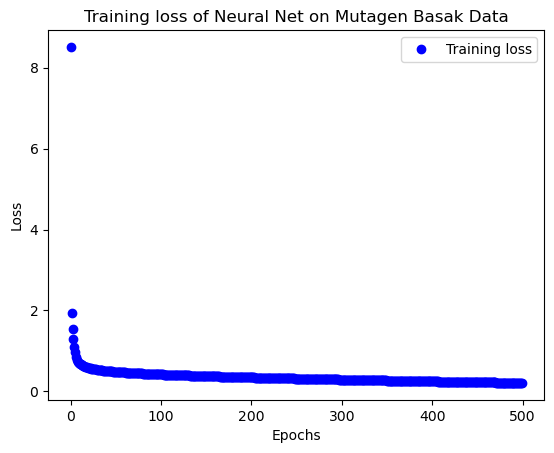

optimal mcc of 0.6005476663915209 at a threshold of 0.49


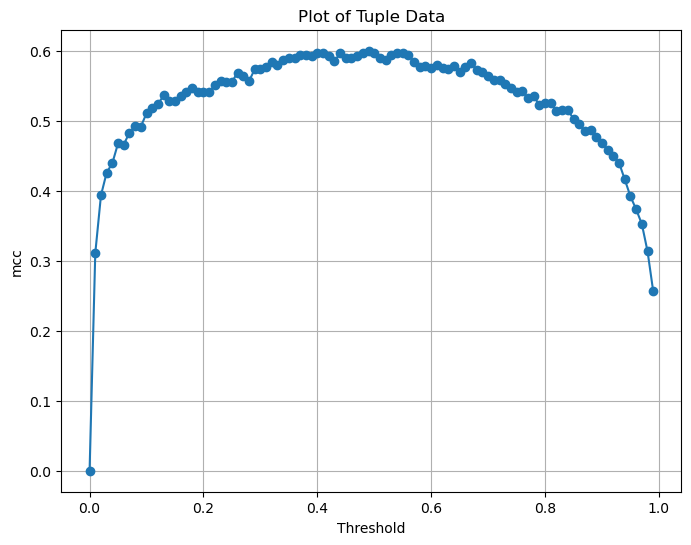

18/18 [==============================] - 0s 452us/step
for model 1 validation metrics of:
positives in data 304
negatives in data 253 

fn count = 66
tn count = 207
tp count = 238
fp count = 46 

net accuracy = 0.7989228007181328
positive accuracy = 0.7828947368421053
negative accuracy = 0.8181818181818182 

fpr = 0.18181818181818182
tpr = 0.7828947368421053 

f1 score = 0.8095238095238095
mcc = 0.5986684171887702
cohen Kappa = 0.5971170984991346


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 181, 1)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 181)               0         
                                                                 
 dense_3 (Dense)             (None, 250)               45500     
                                                                 
 dense_4 (Dense)             (None, 50)                12550     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 58,101
Trainable params: 58,101
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 371us/s

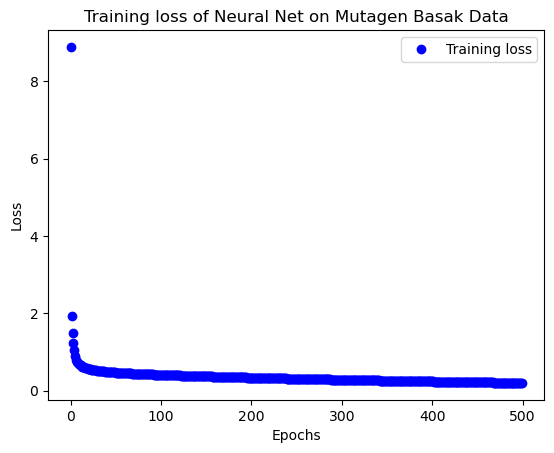

optimal mcc of 0.5474596844498922 at a threshold of 0.6900000000000001


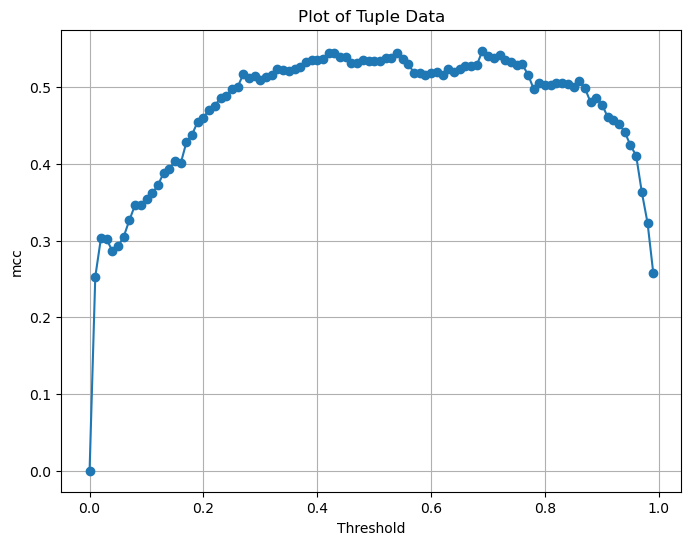

18/18 [==============================] - 0s 467us/step
for model 2 validation metrics of:
positives in data 310
negatives in data 246 

fn count = 63
tn count = 194
tp count = 247
fp count = 52 

net accuracy = 0.7931654676258992
positive accuracy = 0.7967741935483871
negative accuracy = 0.7886178861788617 

fpr = 0.21138211382113822
tpr = 0.7967741935483871 

f1 score = 0.8111658456486043
mcc = 0.5831671967145152
cohen Kappa = 0.5827024487025532


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 181, 1)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 181)               0         
                                                                 
 dense_6 (Dense)             (None, 250)               45500     
                                                                 
 dense_7 (Dense)             (None, 50)                12550     
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 58,101
Trainable params: 58,101
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 350us/s

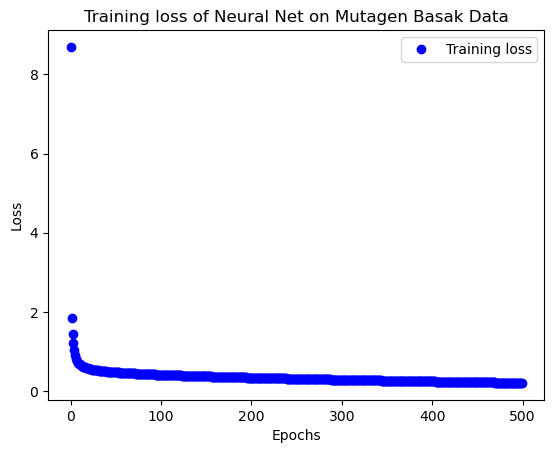

optimal mcc of 0.5686152133277903 at a threshold of 0.8


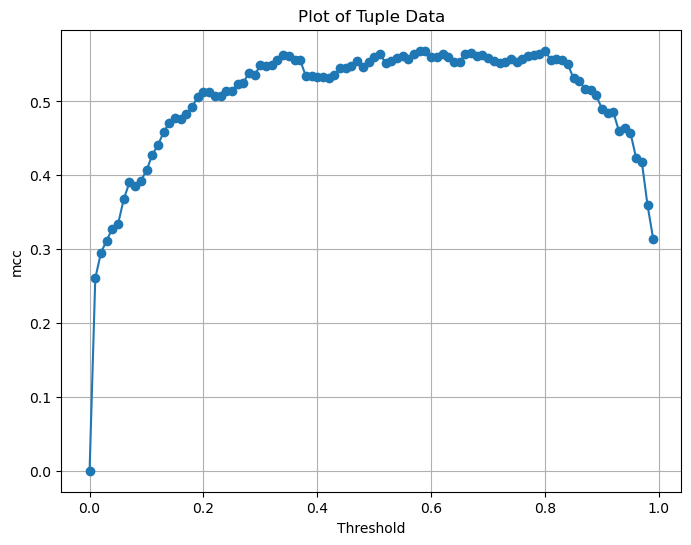

18/18 [==============================] - 0s 363us/step
for model 3 validation metrics of:
positives in data 315
negatives in data 241 

fn count = 92
tn count = 187
tp count = 223
fp count = 54 

net accuracy = 0.737410071942446
positive accuracy = 0.707936507936508
negative accuracy = 0.7759336099585062 

fpr = 0.22406639004149378
tpr = 0.707936507936508 

f1 score = 0.7533783783783784
mcc = 0.4795684617006571
cohen Kappa = 0.4750714553614154


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 181, 1)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 181)               0         
                                                                 
 dense_9 (Dense)             (None, 250)               45500     
                                                                 
 dense_10 (Dense)            (None, 50)                12550     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 58,101
Trainable params: 58,101
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 350us/s

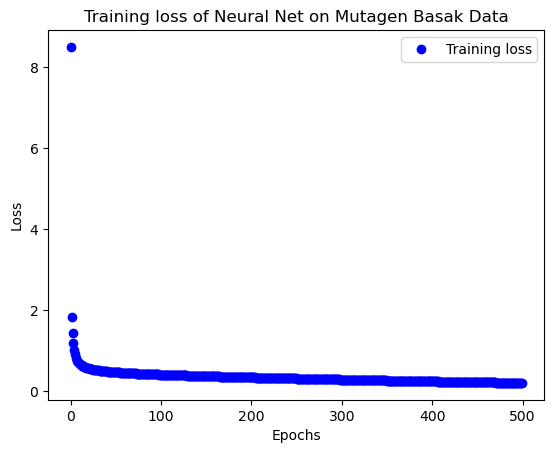

optimal mcc of 0.5742193941924232 at a threshold of 0.48


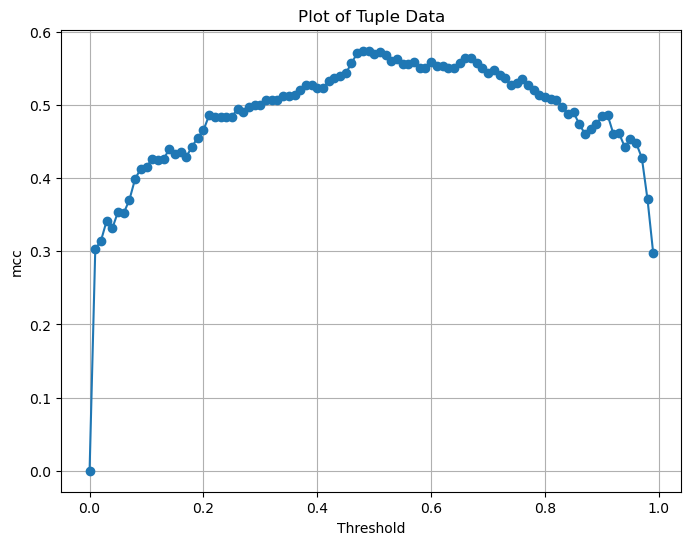

18/18 [==============================] - 0s 389us/step
for model 4 validation metrics of:
positives in data 293
negatives in data 263 

fn count = 36
tn count = 173
tp count = 257
fp count = 90 

net accuracy = 0.7733812949640287
positive accuracy = 0.8771331058020477
negative accuracy = 0.6577946768060836 

fpr = 0.34220532319391633
tpr = 0.8771331058020477 

f1 score = 0.803125
mcc = 0.5514027890198472
cohen Kappa = 0.5406103686605725


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 181, 1)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 181)               0         
                                                                 
 dense_12 (Dense)            (None, 250)               45500     
                                                                 
 dense_13 (Dense)            (None, 50)                12550     
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 58,101
Trainable params: 58,101
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 361us/s

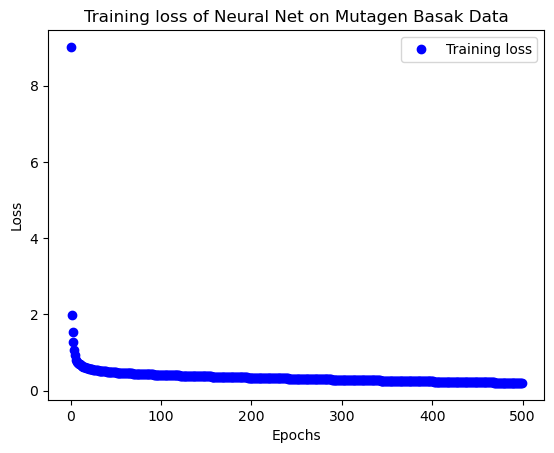

optimal mcc of 0.6419752685583336 at a threshold of 0.5


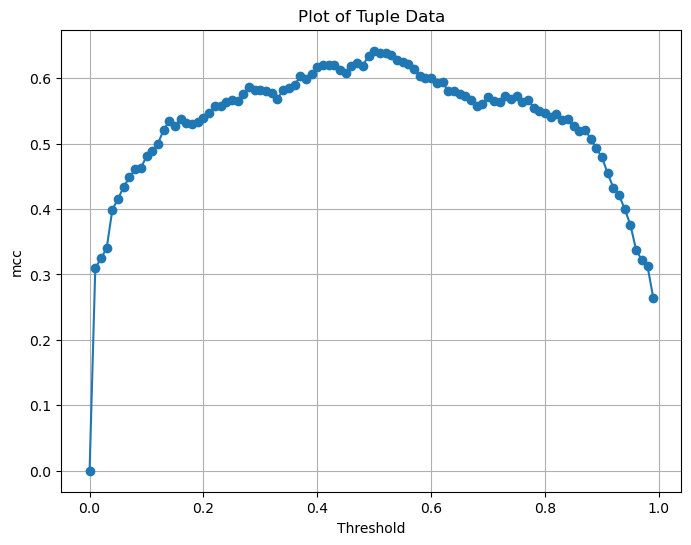

18/18 [==============================] - 0s 406us/step
for model 5 validation metrics of:
positives in data 320
negatives in data 234 

fn count = 51
tn count = 175
tp count = 269
fp count = 59 

net accuracy = 0.8014440433212996
positive accuracy = 0.840625
negative accuracy = 0.7478632478632479 

fpr = 0.25213675213675213
tpr = 0.840625 

f1 score = 0.8302469135802469
mcc = 0.5914657088902838
cohen Kappa = 0.5912042502951594


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
model_list = []
validlist = []
testdat = []
threshlist = []
#For loop that uses each fold once for valid/testing and the rest for training
#Each 'split' in the range corresponds to the set used for test/validation with the other 4 for training
iteration = 1
for split in range(0,5):
    #Set creation
    trainlist = [df for i, df in enumerate(folds) if i != split]
    trainset = pd.concat(trainlist, axis=0)
    #Splits test set into a test and validation set
    testset, validset = train_test_split(folds[split], test_size=0.5, random_state=seed)
    
    ytrain = trainset[1].values
    xtrain = trainset.iloc[:, 2:]
    
    ytest = testset[1].values
    xtest = testset.iloc[:, 2:]
    
    yvalid = validset[1].values
    xvalid = validset.iloc[:, 2:]
    

    # Determines layer size and input/output
    # Here it turns the 334 one hot encoded features to 42
    keras.utils.set_random_seed(seed)
    tf.config.experimental.enable_op_determinism()
    length = len(xtrain.columns)
    temp = length
    # Encoder Creation
    enc_in = keras.Input(shape=(length, 1))
    x = keras.layers.Flatten()(enc_in)
    # Additional encoder layers
    #x = keras.layers.Dense(45, activation="relu")(x)
    x = keras.layers.Dense(250, activation="relu")(x)
    x = keras.layers.Dense(50, activation="relu")(x)
    enc_out = keras.layers.Dense(1, activation="sigmoid")(x)
    autoencoder = keras.Model(enc_in, enc_out, name='autoencoder')
    # Optimiser
    optimise = tf.keras.optimizers.Adam(learning_rate=0.00001)
    
    autoencoder.compile(optimise, loss='binary_crossentropy')
    autoencoder.summary()
    
    #Runs and creates the autoencoder and outputs parameters to a specs file
    ytrain = np.array(ytrain)
    epochs = 500
    batchsize = 16
    losshistory = []

    minloss = 1
    bestepoch = 0
    for epoch in range(epochs):
        verb = 1
        if epoch % 50 != 0:
            verb = 0
        logs = autoencoder.fit(
        xtrain,
        ytrain,
        verbose = verb,
        epochs=1,
        batch_size=batchsize),
        validation_split=0.2,

        #autoencoder.save(str(f"models/AE-{epoch+1}.keras"))
        loss = logs[0].history['loss'][0]
        losshistory.append(loss)
        if loss < minloss:
            minloss = loss
            bestepoch = epoch

    #autoencoder.save(str(f"test/AE-{epoch+1}.keras"))
    model_list.append(autoencoder)
    
    preds = autoencoder.predict(xtest)
    
    epochcount = range(epochs)
    plt.figure()
    plt.plot(epochcount, losshistory, 'bo', label='Training loss')
    plt.title('Training loss of Neural Net on Mutagen Basak Data')
    plt.legend()

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    
    #acc curve creation
    acclist = []
    thresholdlist = []
    maxval = 0
    bestthresh = 0
    for threshold in np.arange(0, 1, 0.01):
        newval = nnmetrics(preds, ytest, threshold)[12]
        acclist.append(newval)
        thresholdlist.append(threshold)
        if newval > maxval:
            maxval = newval
            bestthresh = threshold
    threshlist.append(bestthresh)
    testdat.append(maxval)
    y_values = acclist
    x_values = thresholdlist

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, marker='o', linestyle='-')

    print('optimal mcc of', maxval, 'at a threshold of', bestthresh)

    # Add titles and labels
    plt.title('Plot of Tuple Data')
    plt.ylabel('mcc')
    plt.xlabel('Threshold')

    # Display the plot
    plt.grid(True)
    plt.show()
    
    
    #check models onto validation set, printing various metrics
    preds = autoencoder.predict(xvalid)
    results = nnmetrics(preds, yvalid, bestthresh)
    validlist.append(results)
    print('for model', iteration, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13])
    iteration = iteration + 1

In [4]:
y = tempset[:, 1]
x = tempset[:, 2:]

iter = 1
loops =0
validdat = []
for model in model_list:
    predictions = []
    x = np.asarray(x).astype(np.float32)
    preds = model.predict(x)
    predictions.append(preds)
    
    results = nnmetrics(preds, y, threshlist[loops])
    validdat.append(results[12])
    print('model', iter, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13], '\n')
    iter = iter + 1
    
    loops = loops + 1

44/44 [==============================] - 0s 337us/step
model 1 validation metrics of:
positives in data 759
negatives in data 630 

fn count = 150
tn count = 492
tp count = 609
fp count = 138 

net accuracy = 0.7926565874730022
positive accuracy = 0.8023715415019763
negative accuracy = 0.780952380952381 

fpr = 0.21904761904761905
tpr = 0.8023715415019763 

f1 score = 0.8087649402390438
mcc = 0.5824694275461374
cohen Kappa = 0.5823812387251954 

44/44 [==============================] - 0s 349us/step
model 2 validation metrics of:
positives in data 759
negatives in data 630 

fn count = 148
tn count = 505
tp count = 611
fp count = 125 

net accuracy = 0.8034557235421166
positive accuracy = 0.8050065876152833
negative accuracy = 0.8015873015873016 

fpr = 0.1984126984126984
tpr = 0.8050065876152833 

f1 score = 0.8173913043478261
mcc = 0.6050533861703602
cohen Kappa = 0.6047177806479052 

44/44 [==============================] - 0s 304us/step
model 3 validation metrics of:
positives in d

In [14]:
#get x and y values for the final validation set
import statistics

toxvals = []
fingerprints = []
for row in tempset:
    toxvals.append(row[1])
    fingerprints.append(row[2:])

#calculates consensus of models on each fingerprint in the final validation set
consensuslist = []
predictions = []

for fp in fingerprints:
    consensus = -1
    fp = fp.reshape(1, -1)
    fp = np.asarray(fp).astype('float32')
    #appends each model's prediction to a list
    predlist = []
    for model in model_list:
        preds = model.predict(fp, verbose = 0)
        predlist.append(preds)
    predictions.append(predlist)
    
    #finds number of 0s in the prediction list
    zercount = 0
    loops = 0
    for modelpreds in predlist:
        if modelpreds < threshlist[loops]:
            zercount = zercount + 1
    loops = loops + 1
    
    #as there are 5 models, if there are less than 3 0s predicted, the consensus is 1
    if zercount < 3 :
        consensus = 1
    else:
        consensus = 0
    consensuslist.append(consensus)
    
#calculate and print metrics
results = metriccalc(consensuslist, toxvals)
print('validation metrics of:')
print('positives in data', results[0])
print('negatives in data', results[1], '\n')
print('fn count =', results[2])
print('tn count =', results[3])
print('tp count =', results[4])
print('fp count =', results[5], '\n')
print('net accuracy =', results[6])
print('positive accuracy =', results[7])
print('negative accuracy =', results[8], '\n')
print('fpr =', results[9])
print('tpr =', results[10], '\n')
print('f1 score =',results[11])
print('mcc =',results[12])
print('cohen Kappa =',results[13])

validation metrics of:
positives in data 759
negatives in data 630 

fn count = 100
tn count = 467
tp count = 659
fp count = 163 

net accuracy = 0.8106551475881929
positive accuracy = 0.8682476943346509
negative accuracy = 0.7412698412698413 

fpr = 0.25873015873015875
tpr = 0.8682476943346509 

f1 score = 0.8336495888678052
mcc = 0.6173762650769289
cohen Kappa = 0.6147416245084174


In [6]:
#with open('/Users/james/Documents/Honours/practhesisprep/figure prep/radarplotdata.txt', 'a') as f:
#    print('Chemopy Mutagen NN Consensus MCC =', results[12] , file=f)

In [7]:
0.62

[0.6005476663915209,
 0.5474596844498922,
 0.5686152133277903,
 0.5742193941924232,
 0.6419752685583336]

In [8]:
validdat

[0.5824694275461374,
 0.6050533861703602,
 0.5773126659134074,
 0.6004546700852942,
 0.5776850987474695]